__
This notebook has been created by Jonas Chan for the Udacity Nanodegree.

__How to use:
Each question has been paired with either single or multiple markdown cells which are the descriptions of the questions. They can be typically seen to be in bold. These answers for a specific question starts under the question, continues and ends before the start of the next question. This is intended as I have provided descriptions for certain cells that does not seem clear.

__Thank you :)

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

__
In this section of this Notebook, I first load in the necessary libraries required for the functionality of the implementation of the implementation of the LeNet architecture in order to classify traffic signs

In [17]:
import matplotlib.gridspec as gridspec
import cv2
import matplotlib.image as mpimg
import pickle
import matplotlib.pyplot as plt
import random
import numpy as np
import csv
import pandas as panda_desiigner
import tensorflow as tf
from random import randint
from sklearn.utils import shuffle

# Show visualisations in the notebook
%matplotlib inline


---
## Step 0: Load The Data

                                            QUESTION 1
Provide a basic summary of the data set and identify where in your code the summary was done. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

__
In this section of the notebook, the training data is first loaded. The section labelled "Validation Set" in the cell below illustrates the generation of the validation set from the training set by taking random 30% of the training set

In [2]:
# Load training and testing data
training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# Validation set
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.3, random_state=42)

In [ ]:
# Here the data from the Signnames.csv file is loaded into SignNames

In [18]:
# Load signnames
# CSV file for sign names
SignNames = panda_desiigner.read_csv("signnames.csv")

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [4]:
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

n_valid = len(X_validation)


# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation sets =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 24359
Number of testing examples = 12630
Number of validation sets = 10440
Image data shape = (32, 32, 3)
Number of classes = 43


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
# Shuffle the training data so that the order of the data does not affect how the network trains
print("Shuffling training data...")
X_train, y_train = shuffle(X_train, y_train)
print("Successfully shuffled training data!")

Shuffling training data...
Successfully shuffled training data!


In [ ]:
# Pick random signs
def get_image_and_label(image_input):  
       ## SignNames.loc[y_train[image_input],"SignName"]
        X_train_random, SignName_random = X_train[image_input], SignNames.loc[y_train[image_input],"SignName"]
        return X_train_random, SignName_random
    


In [8]:
import matplotlib.gridspec as gspec

def plot_image_to_grid(input_image = [], title = []):
    grid_param = gspec.GridSpec(5, 5)
    grid_param.update(wspace=10, hspace=10)
    plt.figure(figsize=(12,12))

    for i in range(len(input_image)):
        axis = plt.subplot(grid_param[i])
        axis.set_xticklabels([])
        axis.set_yticklabels([])
        axis.set_aspect('equal')
        img = input_image[i].squeeze()

        plt.subplot(5 , 5 , i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title[i])
        plt.axis('off')

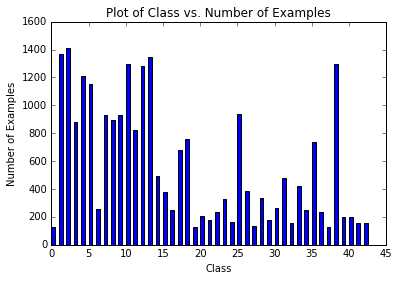

In [9]:
# Here we plot the number of examples in each class. As described in cell #2,
# there are 43 unique classes.

# Store the classes and examples into unique and examples_per_class variables
# respectively.
unique, examples_per_class = np.unique(y_train, return_counts = True)

# Plot the classes and examples_per_class into a bar chart.
plt.bar(unique, examples_per_class, 0.5, color='b')
plt.xlabel("Class")
plt.ylabel("Number of Examples")
plt.title("Plot of Class vs. Number of Examples")
plt.show()


__
Based on the data shown in the plot above, we can see that the data is highly unbalanced.
Based on my research about unbalanced data, Tom Fawcett from his post titled 
"Learning from Imbalanced Classes", stated that imbalanced data is quite a norm and conventional
algorithms implementing loss functions to optimize quantities and minimizing error rate is 
perfectly acceptable. I will further explore on this topic in the section titled "Handling
Imbalanced Data" in the cells below.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

                                        QUESTION 1
Describe how, and identify where in your code, you preprocessed the image data. What tecniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc.

__
In this section of the notebook, I took into account four image augmentation
preprocessing techniques of which are:
1. transforming the image (including rotating, translating, shearing the image)
2. Histogram equalization using OpenCV
3. Local contrast normalization 
4. Grayscale

__
*Please note that I did not write the transform image method but rather implemented it from here:
 https://medium.com/@vivek.yadav/improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification-using-6355346da2dc#.qo3k7hlbi
 Although I did not write the code, I took the time to understand the theory behind it.
 a. Transforming the image
    Starting out with this technique got me thinking a lot about why this is needed in the first
    place. I mean, we have approx. 21k data, shouldn't it be enough for training? Then it got
    me thinking that what if the traffic sign has is viewed from a corner where the image is no
    longer dead straight but rather distorted from the same POV. So transforming the image, which
    include rotating, translating and shearing the image to provide the distortion mentioned earlier
    can help resolve this issue since all the images provided in the training dataset aren't.
 b. Histogram equalization
    OpenCV documentation (http://docs.opencv.org/3.2.0/d5/daf/tutorial_py_histogram_equalization.html)
    provided a basic but detailed explanation why this is useful. In summary, this technique improves
    the contrast of the images.
 c. Local contrast normalization
    I looked for other "easier" and "implementable" preprocessing technique and came across this
    excerpt in https://www.quora.com/What-is-local-contrast-normalization-in-computer-vision
    that mentioned that this technique is used to "normalize the contrast of an image in a
    non-linear way". What I understand from this is to remove bright regions from an image while
    keeping pixel intensities within a certain range.
 d. Grayscale
    Yann Lecun showed that the best accuracy was best achieved using grayscale image in the paper:
    http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

__
So based on my explanations above, my image augmentation preprocessing technique is as follows:
Convert to grayscale > histogram equalize > local contrast normalization > transforming the image

In [11]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def convert_to_grayscale(original_image):
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    return grayscale_image

def blur_image(original_image):
    blurred_image = cv2.blur(original_image,(5,5))
    return blurred_image

def local_contrast_normalization(image):
    return (image - 125.0) / 255.0

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def hist_equalize(image):
    return cv2.equalizeHist(image)

def transform_image(img,ang_range=10,shear_range=2,trans_range=2,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
      
    return img
 
def preprocess_Image(image):
    new_image = local_contrast_normalization(hist_equalize(convert_to_grayscale(image)))
    reshaped = new_image.reshape(new_image.shape + (1,))
    return transform_image(reshaped)


### Model Architecture

                                        QUESTION 2
Describe how, and identify where in your code, you set up training, validation and testing data. How much data was in each set? Explain what techniques were used to split the data into these sets. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, identify where in your code, and provide example images of the additional data)

__
"Handling Imbalanced Data"
Tom Fawcett from his post titled "Learning from Imbalanced Classes" stated that there are several
ways to handle imbalanced data and one of which is "Balance the training set". Foster provost in his 
paper titled Machine Learning from Imbalanced Data Sets stated that using imbalanced data without
adjusting them is a mistake and went on stating that common practices of balancing imbalanced data
sets include up-sampling and down-sampling. Using the up-sampling method, I generated adiditional0
data for training in order to handle the fact that we have imbalanced data.

__
To do this, 
1. I first set a new random target count to fit into the existing datasets. 
2. Using this new target, I calculate the amount of new samples I require in order to 
   meet the target by calculating the difference between the target and the count in the class.
3. I distort the new images by passing it through the transform_image function
4. Combine the new images with the existing ones and store them into X_train

__
The cell below shows that after oversampling existing data, the new data set now contains 215000
different images separated evenly across 43 classes (43 X 5000 = 215000) and each image has the
shape of 32 X 32 X 3.

In [12]:
from sklearn.utils import resample
target = 5000

for label, count in enumerate(examples_per_class):
    target_generation = target - count
    
    X_sample, y_sample = resample(X_train[y_train == label], y_train[y_train == label], n_samples = target_generation, random_state = 42)
    
    X_jittered = np.zeros_like(X_sample)
    
    for x, image in enumerate(X_sample):
        X_jittered[x] = transform_image(image)
        
    X_train = np.concatenate((X_train, X_jittered))
    y_train = np.concatenate((y_train, y_sample))
    
print(X_train.shape)
print(y_train.shape)

(215000, 32, 32, 3)
(215000,)


__
In this section of the notebook, the new data generate from the oversampling method as shown 
in the cell above is augmented using the image augmentation preprocessing technique and is stored
into new arrays X_train_new, X_valid_new and X_test_new for training datasets, validation datasets 
and testing datasets respectively.

In [13]:
X_train_new = []
X_valid_new = []
X_test_new = []

for i in range(len(X_train)):
    train_gray = preprocess_Image(X_train[i])
    X_train_reshaped = train_gray.reshape(train_gray.shape + (1,))
    X_train_new.append(X_train_reshaped)
    
for i in range(len(X_validation)):   
    valid_gray = preprocess_Image(X_validation[i])
    X_valid_reshaped = valid_gray.reshape(valid_gray.shape + (1,))
    X_valid_new.append(X_valid_reshaped)

for i in range(len(X_test)):
    test_gray = preprocess_Image(X_test[i])
    X_test_reshaped = test_gray.reshape(test_gray.shape + (1,))
    X_test_new.append(X_test_reshaped)


(32, 32, 1)


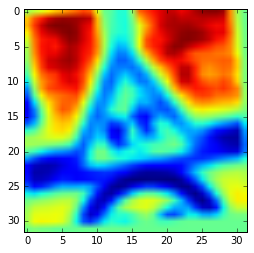

In [14]:
plt.imshow(X_train_new[0].squeeze())
print(X_train_new[0].shape)

In [15]:
# As explained in the lectures:
# EPOCH is the number of times the training data runs through the network. The data will pass 
# through the network 10 times at a rate of 250 images per batch.

# CONVNET PARAMETERS
EPOCHS = 10
BATCH_SIZE = 250

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

                                    QUESTION 5
Describe the approach taken for finding a solution. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

*Description for Question 3, 4 and 5
__
The structure of my LeNet architecture is as follows:
Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6. 1 X 1 stride, VALID padding
Layer 2: Activation: RELU
Layer 3: Pooling. Input = 28x28x6. Output = 14x14x6.
Layer 4: Convolutional. Output = 10x10x64. 2 X 2 stride, VALID padding
Layer 5: Activation: RELU
Layer 6: Pooling. Input = 10x10x64. Output = 5x5x64.
Layer 7: Flatten. Input = 5x5x64. Output = 1600.
Layer 8: Fully Connected. Input = 1600. Output = 120.
Layer 9: Activation: RELU
Layer 10: Dropout with keep probability of 0.5
Layer 11: Fully Connected. Input = 120. Output = 84.
Layer 12: Dropout with keep probability of 0.5
Layer 13: Activation: RELU
Layer 14: Fully Connected. Input = 84. Output = 43. 
Layer 15: Softmax

__
Additional Operations include adding l2_regularisation in order to reduce overfitting in order to
make better predictions

__
I used the Adam Optimizer for this architecture

__
The hyperparameters used are as follows:
1. l2 regularisation mulltiplier, lss = 0.001
2. mean, mu = 0
3. standard deviation, sigma = 0.1
4. dropout keep probability, keep_prob = 0.5
5. Number of Epochs, EPOCH = 10
6. Batch size, BATCH_SIZE = 250

__
The hyperparameters stated here are the final ones used. I have implemented multiple changes to the 
architecture which include adding more convolutional layers, adding more fully connected layers, 
adding dropout after every convolutional and fully connected layers, increasing the standard deviation, 
and last but DEFINITELY not the least, increasing the EPOCH.Their impact on the final predictions had 
very little to no change at all but TOOK FOREVER to complete. Going back to basics I found these 
hyperparameters gave the best results. 

__
My trials during these stages include results where I had high validation and test accuracy 
with low prediction accuracy using the images obtained online typically 0 to 20% prediction accuracy.
At one stage, I had really low accuracy, approximately 3.1% after 20 epochs. This indicated that I 
had underfitted the data and increasing the batch size from 128 to 250 helped. 

In [16]:
#Insert LeNet here. Check vid what parameters need changing.
from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 64), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(64))
fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 120), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(120))
fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.zeros(84))
fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(43))

# def LeNet(x):    
#     # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    
#     # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.

#     conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

#     # SOLUTION: Activation.
#     conv1 = tf.nn.relu(conv1)

#     # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
#     conv1_pool = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     do1 = tf.nn.dropout(conv1_pool, 0.5)
#     # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.

#     conv2   = tf.nn.conv2d(do1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
#     # SOLUTION: Activation.
#     conv2 = tf.nn.relu(conv2)

#     # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
#     conv2_pool = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     do2 = tf.nn.dropout(conv2_pool, 0.5)

#     # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
#     fc0   = tf.concat([flatten(do2), flatten(do1)] , 1)
#     fc0_relu = tf.nn.relu(fc0)
#     do3 = tf.nn.dropout(fc0_relu, 0.5)
#     # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.

#     fc1   = tf.matmul(do3, fc1_W) + fc1_b
    
#     # SOLUTION: Activation.
#     fc1_relu = tf.nn.relu(fc1)
#     do4 = tf.nn.dropout(fc1_relu, 0.5)

#     # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.

#     fc2    = tf.matmul(do4, fc2_W) + fc2_b
    
#     # SOLUTION: Activation.
#     fc2_relu = tf.nn.relu(fc2)
#     do5 = tf.nn.dropout(fc2_relu, 0.5)

#     # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.

#     logits = tf.matmul(do5, fc3_W) + fc3_b
    
#     return logits

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, 0.5)
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.dropout(fc2, 0.5)

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [18]:
rate = 0.001
logits = LeNet(x)
lss = 0.001

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
l2_loss = lss * (tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W))
loss_operation = tf.reduce_mean(cross_entropy + l2_loss)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_new)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_one, y_train_one = shuffle(X_train_new, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_one[offset:end], y_train_one[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_new, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.688

EPOCH 2 ...
Validation Accuracy = 0.800

EPOCH 3 ...
Validation Accuracy = 0.854

EPOCH 4 ...
Validation Accuracy = 0.875

EPOCH 5 ...
Validation Accuracy = 0.892

EPOCH 6 ...
Validation Accuracy = 0.914

EPOCH 7 ...
Validation Accuracy = 0.916

EPOCH 8 ...
Validation Accuracy = 0.921

EPOCH 9 ...
Validation Accuracy = 0.927

EPOCH 10 ...
Validation Accuracy = 0.929

Model saved


In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_new, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.874


                                                        Review Questions
My network architecture is based on a Convolutional Neural Network (CNN or CONVNET). One of the main reasons why CONVNET was used was due to the fact that CONVNET is typically used as a feature extractor which is excellent in this case since images are made of a combination of many different features (in short, they tend to do well with identifying images). The CONVNET implemented here is mostly the same as the LeNet neural network with 2 convolutional layers and 3 fully connected layer. During the course of training the network, in the attempt to increase the overall accuracy of the validation set as well as the accuracy of the test set, I have previously tried reducing the number of convolutional layers as well as increasing the number of convolutional layers by one. What resulted from decreasing the number of convolutional layers was that although the computational time decreased by a fair amount it negatively impacted the accuracy after 10 EPOCHS. On the other hand, increasing the number of convolutional layers had seem to increase the accuracy by a little but took a very long time to process, hence leaving me with my current architecture which seemed better than the lowered conv. layer in terms of accuracy as well as the increased conv. layer in terms of processing time. Given the time and hardware and of course, funding, I would like to increase the conv. layer to examine the overall accuracy. What I learnt from 
the purpose of the convolutional layer is that it consists of a set "learnable filters". For instance, the first convolutional layer has a size of 5 X 5 X 3 (5 pixels in with, 5 pixels and a depth of 1 with the output depth of 6), in which it intutively  
"learn" filters that activates when it sees some sort of a visual feature.

RELU was used as an activation layer. As decribed in the lectures (I'm paraphrasing here), ReLU is used as part of the effort to speed up training by preventing the vanishing gradient issue. In addition to the convolutional layer, I also implemented the use of pooling layers in between each convolutional layers. This was implemented with the intention to reduce the size of the input which in turn, allows the neural network to focus on only the most important elements. 

As mentioned before, my architecture is based that of the LeNet's architecture with an addition of a dropout layer after the fully connected layer which did reduce the accuracy of the first few epochs (I tried it during the lab and the initial epoch has accuracy of approx. 80%) but improved the accuracy of the my test set by approx. 2%. During my entire testing phase, my test accuracy was lower than the validation accuracy (even now) which I later found out that this was due to overfitting. Implementing dropout did help to increase my accuracy by preventing overfitting. I started with a low dropout probability of 0.2 but later increased it to 0.5 as accuracy of the test set increased but later stopped at 0.5 since increasing the probability to 0.6 and 0.7 did improve the accuracy but only by a minute amount, approx 0.01%


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

def process_newimage_file(name):
    image = cv2.imread(name)
    image = cv2.resize(image,(32,32))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image/255.-.5
    return image

def plot_newImage_3C(n_row,n_col,X):

    plt.figure(figsize = (8,6))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = i
        plt.imshow(X[ind_plot])
        plt.axis('off')
    plt.show()

                                        QUESTION 1
Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

__
In the cell below, I import the data from the german-signs folder I downloaded online as shown below

                                        REVIEW QUESTIONS
The images used here are Stop sign, No Entry sign, Ahead Only sign, Speed Limit (60 km/h) and Speed Limit (30 km/h). Looking at the images here, it one difficulty that the classifier might have is the low resolution of the images. The shape of the images are very similar to the ones in the training set so I would expect them to be classified correctly and would contain no particular aspect that would trick the model to misclassify them. However, due to multiple speed limit signs having circles surrounding the speed limit numbers, I would expect that it will be easy for it to identify that it is a SPEED LIMIT sign but would struggle to identify the exact speed.

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
newdata = [process_newimage_file("./german-signs/"+name) for name in os.listdir("./german-signs/")]
namenewdata = [name for name in os.listdir("./german-signs/")]
newdata = np.array(newdata ,dtype = np.float32)


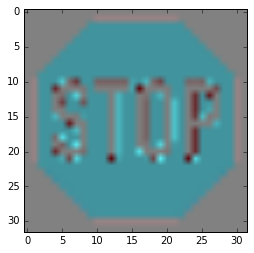

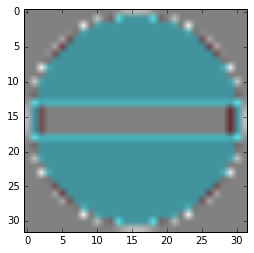

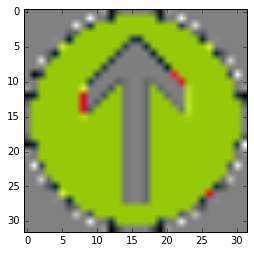

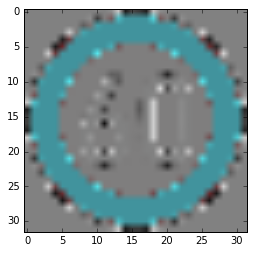

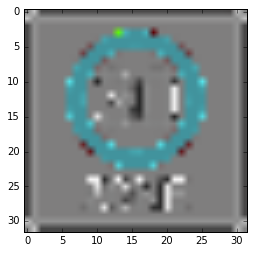

In [14]:
for i in range(5):
    plt.imshow(newdata[i])
    plt.show()

__
The new data is then passed through the image augmentation preprocessing pipeline

In [24]:
X_german_signs = []

for i in range(len(newdata)):
    german_gray = convert_to_grayscale(newdata[i])
    german_gray_reshaped = german_gray.reshape(german_gray.shape + (1,))
    X_german_signs.append(german_gray_reshaped)
    
print(len(X_german_signs))
print(X_german_signs[0].shape)

5
(32, 32, 1)


In [49]:
y_pred_prob = tf.nn.softmax(logits)
top_pred_prob = tf.nn.top_k(y_pred_prob, 5)
y_pred_class = tf.argmax(logits, 1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    pred_class = sess.run(y_pred_class, feed_dict = {x: X_german_signs})
    top_prob = sess.run(top_pred_prob, feed_dict = {x: X_german_signs})
    
for i in range(5):
    print(pred_class[i])

14
17
35
3
1


                                        QUESTION 2
Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. Identify where in your code predictions were made. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

__
The cell below illustrates the images downloaded online and its predictions. Based on the results
shown below, it can be seen that the predictions is 80%, 4/5 correct. Comparing the accuracy of the
test set which is 0.874, a small deviation from what is shown below, 80% shows that the architecture
performed well with room for more improvements.

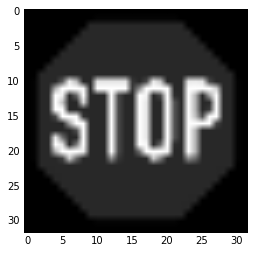

SKYNET has predicted that image 1.png belongs to class 14 of which the Class ID is: Stop


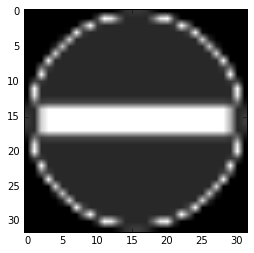

SKYNET has predicted that image 3.png belongs to class 17 of which the Class ID is: No entry


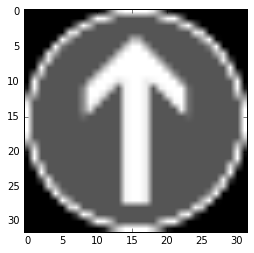

SKYNET has predicted that image 4.png belongs to class 35 of which the Class ID is: Ahead only


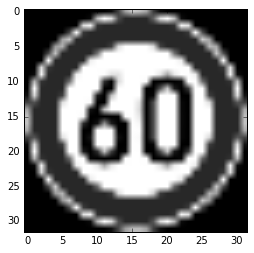

SKYNET has predicted that image 5.png belongs to class 3 of which the Class ID is: Speed limit (60km/h)


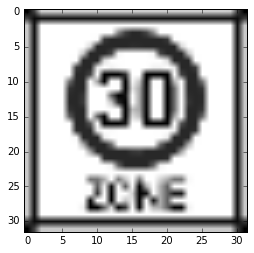

SKYNET has predicted that image 6.png belongs to class 1 of which the Class ID is: Speed limit (30km/h)


In [98]:
for i in range(5):
    signname = " of which the Class ID is: " + str(SignNames.loc[pred_class[i],"SignName"])
    plt.imshow(X_german_signs[i].squeeze(), cmap = 'gray')
    plt.show()
    print("SKYNET has predicted that image " + str(namenewdata[i]) + " belongs to class " + str(pred_class[i]) + signname)


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

                                      QUESTION 3
Describe how certain the model is when predicting on each of the five new images by 
looking at the softmax probabilities for each prediction and identify where in your code 
softmax probabilities were outputted. Provide the top 5 softmax probabilities for each image 
along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions"
part of the rubric, visualizations can also be provided such as bar charts)

__
As shown in the results below, it can be seen that the model is certain that the 
first image (Stop) is a Stop Sign with a prediction probability of 96%. The 
model is also certain that the second image(No Entry) is a No Entry sign with the 
prediction probability of 99.7%. In addition to that, the model is certain that 
the third image is an Ahead Only sign with the probability of 99.2% as well as the 
last image is a Speed Limit of 30 km/h with the probability of 61.6%. For the second
image, the model thinks that the it is a Speed Limit 60 km/h with a prediction level
of 47.5%

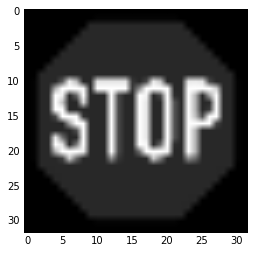


Class #14 - Prob: 0.961348
Class #12 - Prob: 0.0169931
Class #17 - Prob: 0.00459238
Class #22 - Prob: 0.00223711
Class #38 - Prob: 0.00205492


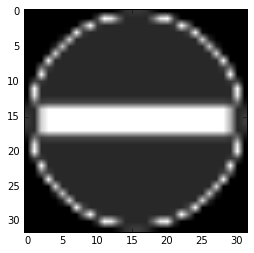


Class #17 - Prob: 0.99726
Class #14 - Prob: 0.00273755
Class #34 - Prob: 2.71473e-06
Class #38 - Prob: 1.50406e-13
Class #40 - Prob: 1.17004e-14


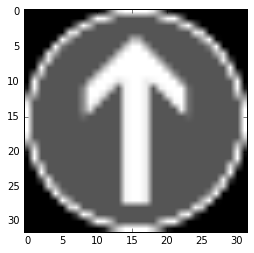


Class #35 - Prob: 0.99234
Class #36 - Prob: 0.0076575
Class #15 - Prob: 1.41176e-06
Class #13 - Prob: 6.9379e-07
Class #9 - Prob: 1.4291e-07


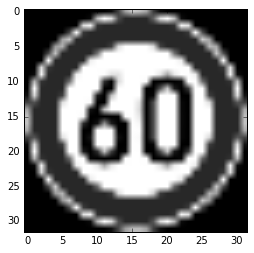


Class #2 - Prob: 0.475001
Class #14 - Prob: 0.468048
Class #3 - Prob: 0.0441655
Class #15 - Prob: 0.0121351
Class #8 - Prob: 0.000444412


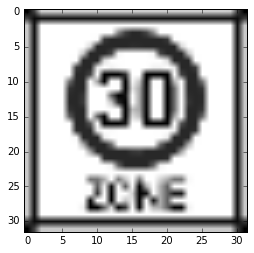


Class #1 - Prob: 0.616256
Class #5 - Prob: 0.162631
Class #2 - Prob: 0.161874
Class #7 - Prob: 0.0301783
Class #3 - Prob: 0.011035


In [30]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
for i in range(5):
    plt.imshow(X_german_signs[i].squeeze(), cmap = 'gray')
    plt.show()
    print()
    for j in range(5):
        print("Class #" + str(top_prob[1][i][j]) + " - Prob: " + str(top_prob[0][i][j]))

In [19]:
SignNames

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 